In [1]:
from rdkit.Chem.Draw import MolsToGridImage

def show_grid_mols(ad):
    mols = [Chem.MolFromSmiles(s) for s in smiles_list[runs.index(ad)][:50]]
    img = MolsToGridImage(mols, legends=[str(i) for i in range(len(mols))], molsPerRow=5, returnPNG=True)
    return img

def save_mols(ad, indexes):
    mols = []
    for i, s in enumerate(smiles_list[runs.index(ad)][:50]):
        if i in indexes:
            mols.append(Chem.MolFromSmiles(s))
    img=MolsToGridImage(mols, molsPerRow=5, subImgSize=(300, 160), useSVG=True)
    with open('images/JAK2/typical_structures_{}.svg'.format(ad), 'w') as f_handle:
        f_handle.write(img.data)
        

In [2]:
import os
import numpy as np
import json
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from utils import data_split, ClusterFps, ecfp4, find_cluster, max_tanimoto_similarity, indexes_identical_fps, average_tanimoto_similarity, tanimoto_similarities, calculateScore, Descriptors, quantitative_analysis

import matplotlib.pyplot as plt
import math
import scipy
import pandas as pd
import seaborn as sns 
import matplotlib
from sklearn.cluster import KMeans

font = {'family' : 'normal',
        'size'   : 35}

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size': 35,
    'text.usetex': True,
    'pgf.rcfonts': False,
})


matplotlib.rcParams['axes.unicode_minus'] = False
sns.set()
%matplotlib inline 

In [3]:
assay_name = "CHEMBL3888429_cleaned"
rundir = "/cloud-data/idd-machinelearning/molecule_generation/AD4AI/results/jak2_modified/smiles_ga/CHEMBL3888429_cleaned/"

In [6]:
# Extract runs and results from generative models 
runs = []
smiles_list = []
scores_list = []
scores_trajectories_smiles_ga = []

print(os.listdir(rundir))

for directory in os.listdir(rundir):
    if directory == 'ecfp4_range_physchem_range_ecfp4_counts':
        smiles = []
        scores = []
        trajectories = []

        for result_dir in os.listdir(os.path.join(rundir, directory)):
            with open(os.path.join(rundir, directory, result_dir, 'results.json'), 'r') as f:
                results = json.load(f)
                smiles.extend([row['smiles'] for row in results['statistics']][-1])
                scores.extend([row['preds']['scores'] for row in results['statistics']][-1])
                trajectories.extend([np.array(row['preds']['scores']) for row in results['statistics']])
                average_trajectories = np.array([np.array(row['preds']['scores'][:100]) for row in results['statistics']])
        if len(smiles)>0:
            runs.append(directory[6:])
            scores_trajectories_smiles_ga.append(average_trajectories)
            smiles_list.append(smiles)
            scores_list.append(scores)

['ecfp4_range_physchem_maxsim_ecfp6', 'ecfp4_range_physchem_maxsim_ap', 'ecfp4_range_physchem_range_ecfp4_counts', 'ecfp4_range_physchem_range_ecfp4', 'ecfp4_range_physchem_range_ecfp6', 'ecfp4_maxsim_ecfp6', 'ecfp4_maxsim_ecfp4', 'ecfp4_range_physchem_maxsim_ecfp4', 'ecfp4_range_ecfp4', 'ecfp4_range_physchem_range_ap', 'ecfp4_range_qed', 'ecfp4_smiles_validity_ecfp4', 'ecfp4_maxsim_ap', 'ecfp4_range_physchem', 'ecfp4_range_ecfp4_counts']


In [7]:
assay_name = "CHEMBL3888429_cleaned"
rundir = "results/jak2_modified/graph_ga/CHEMBL3888429_cleaned/"

In [8]:
# Extract runs and results from generative models 
runs = []
smiles_list = []
scores_list = []
scores_trajectories_graph_ga = []

print(os.listdir(rundir))

for directory in os.listdir(rundir):
    if directory == 'ecfp4_range_physchem_range_ecfp4_counts':
        smiles = []
        scores = []
        trajectories = []

        for result_dir in os.listdir(os.path.join(rundir, directory)):
            with open(os.path.join(rundir, directory, result_dir, 'results.json'), 'r') as f:
                results = json.load(f)
                smiles.extend([row['smiles'] for row in results['statistics']][-1])
                scores.extend([row['preds']['scores'] for row in results['statistics']][-1])
                trajectories.extend([np.array(row['preds']['scores']) for row in results['statistics']])
                average_trajectories = np.array([np.array(row['preds']['scores'][:100]) for row in results['statistics']])
        if len(smiles)>0:
            runs.append(directory[6:])
            scores_trajectories_graph_ga.append(average_trajectories)
            smiles_list.append(smiles)
            scores_list.append(scores)

['ecfp4_range_physchem_maxsim_ecfp6', 'ecfp4_range_physchem_maxsim_ap', 'ecfp4_range_physchem_range_ecfp4_counts', 'ecfp4_range_physchem_range_ecfp4', 'ecfp4_range_physchem_range_ecfp6', 'ecfp4_maxsim_ecfp6', 'ecfp4_maxsim_ecfp4', 'ecfp4_range_physchem_maxsim_ecfp4', 'ecfp4_range_ecfp4', 'ecfp4_range_physchem_range_ap', 'ecfp4_range_qed', 'ecfp4_smiles_validity_ecfp4', 'ecfp4_maxsim_ap', 'ecfp4_range_physchem', 'ecfp4_range_ecfp4_counts']


In [9]:
assay_name = "CHEMBL3888429_cleaned"
rundir = "results/jak2/lstm_hc/CHEMBL3888429_cleaned/"

In [10]:
# Extract runs and results from generative models 
runs = []
smiles_list = []
scores_list = []
scores_trajectories_lstm_hc = []

print(os.listdir(rundir))

for directory in os.listdir(rundir):
    if directory == 'ecfp4_range_physchem_range_ecfp4_counts':
        smiles = []
        scores = []
        trajectories = []

        for result_dir in os.listdir(os.path.join(rundir, directory)):
            with open(os.path.join(rundir, directory, result_dir, 'results.json'), 'r') as f:
                results = json.load(f)
                smiles.extend([row['smiles'] for row in results['statistics']][-1])
                scores.extend([row['preds']['scores'] for row in results['statistics']][-1])
                trajectories.extend([np.array(row['preds']['scores']) for row in results['statistics']])
                average_trajectories = np.array([np.array(row['preds']['scores'][:100]) for row in results['statistics']])
        if len(smiles)>0:
            runs.append(directory[6:])
            scores_trajectories_lstm_hc.append(average_trajectories)
            smiles_list.append(smiles)
            scores_list.append(scores)

['ecfp4_range_physchem_maxsim_ecfp6', 'ecfp4_range_physchem_maxsim_ap', 'ecfp4_range_physchem_range_ecfp4_counts', 'ecfp4_range_physchem_range_ecfp4', 'ecfp4_range_physchem_range_ecfp6', 'ecfp4_maxsim_ecfp6', 'ecfp4_maxsim_ecfp4', 'ecfp4_filters_validity_ecfp4', 'ecfp4_range_physchem_maxsim_ecfp4', 'ecfp4_range_ecfp4', 'ecfp4_range_physchem_range_ap', 'ecfp4_range_qed', 'ecfp4_smiles_validity_ecfp4', 'ecfp4_maxsim_ap', 'ecfp4_range_physchem', 'ecfp4_range_ecfp4_counts']


In [14]:
scores_test, smiles_test, activities_test, clf = data_split(assay_name)

Reading data from: datasets/CHEMBL3888429_cleaned.csv


In [15]:
scores_trajectories = [scores_trajectories_lstm_hc, scores_trajectories_smiles_ga, scores_trajectories_graph_ga]

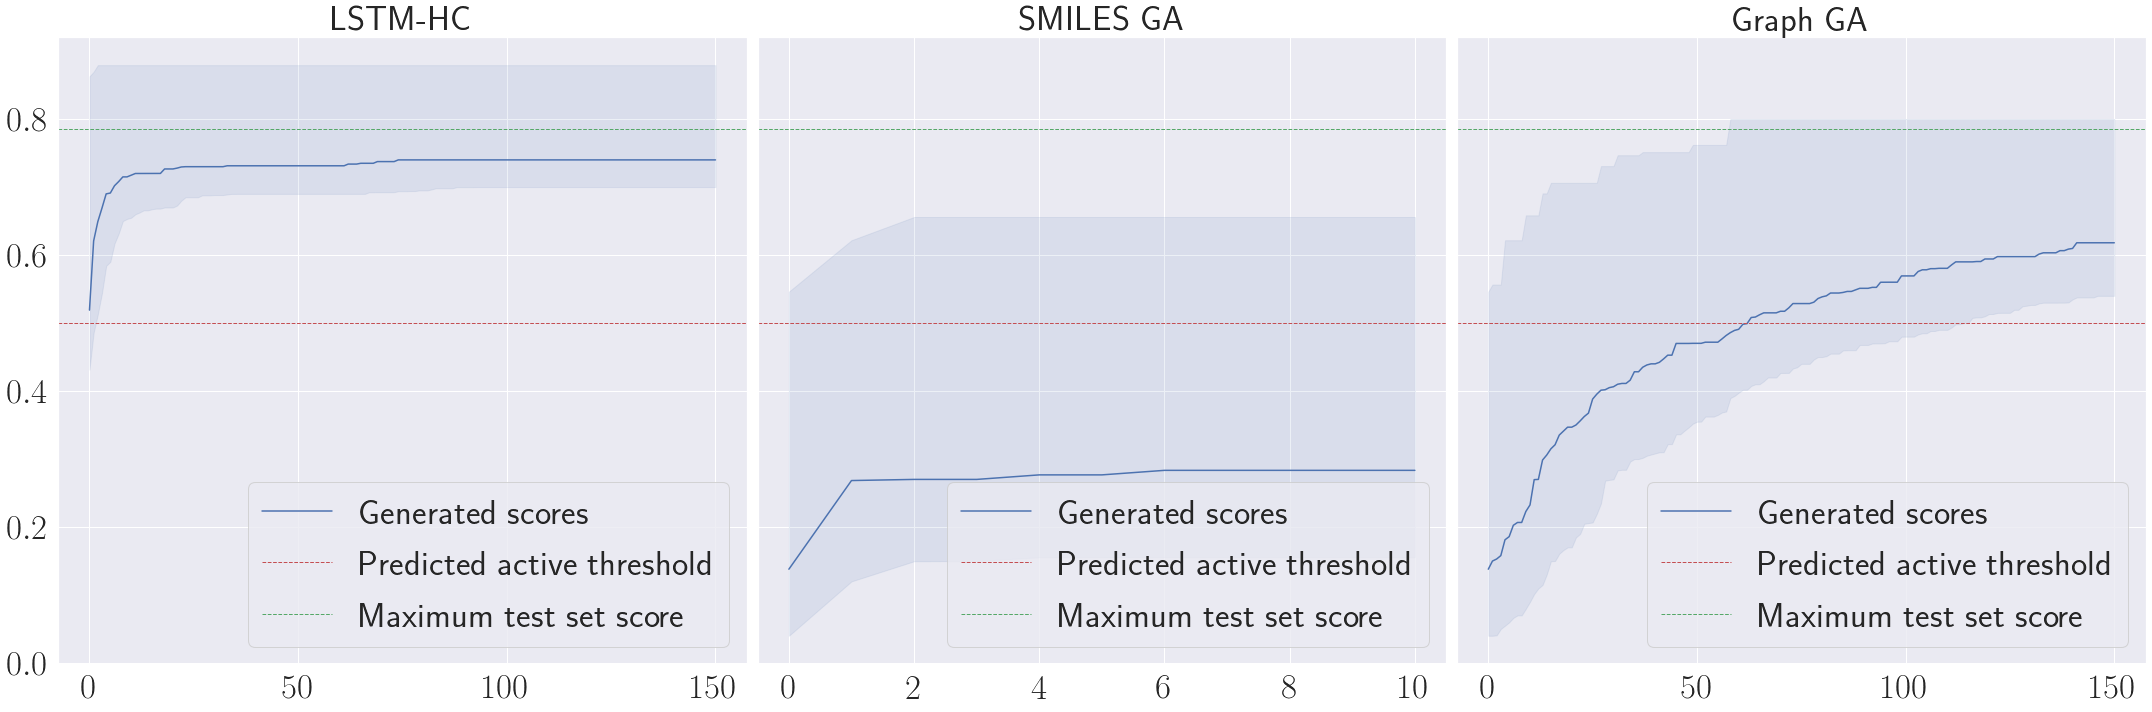

In [23]:
# Scores distribution throughout optimization for the different AD
ordered_runs = ['LSTM-HC', "SMILES GA", "Graph GA"]
fig, axs = plt.subplots(figsize = (30, 10), nrows=max(1, math.ceil(len(ordered_runs)/3)) , ncols=3, sharey=True)

fig.tight_layout(pad=1.5)

for i, run in enumerate(ordered_runs):
    ax = axs.flatten()[i]
    ax.set_title(run.replace('_', ' '), fontsize=35)
    scores = np.array(scores_trajectories[i][0])
    median = np.median(scores, 1)
    q25 = np.percentile(scores, 5, axis=1)
    q75 = np.percentile(scores, 95, axis=1)
    ax.plot(median, c='b', label='Generated scores')
    ax.fill_between(
        np.arange(median.shape[0]), q25, q75, alpha=.1, color='b')
    ax.axhline(y=0.5, linewidth=1, ls='--', color='r', label='Predicted active threshold')
    ax.axhline(y=np.max(scores_test), linewidth=1, ls='--', color='g', label='Maximum test set score')
    ax.legend(loc=4, fontsize=35)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
plt.tight_layout()
plt.savefig('images/JAK2/scores_distribution_comparison.pdf', dpi=300)